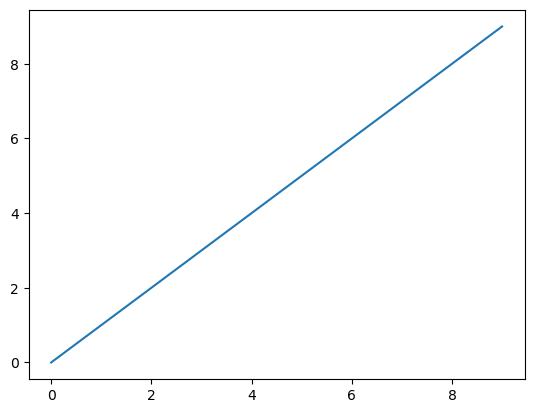

In [4]:
#package imports
#If using Jupyter locally, make sure you have pip installed saphires and any dependencies you need.
#You should have done this as part of our last lab
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Qt5Agg') #comment this line out if using colab
import numpy as np
import os
from scipy.optimize import curve_fit
#from matplotlib.backends.backend_pdf import PdfPages



%matplotlib inline
import pickle as pkl
from scipy.ndimage import gaussian_filter
import astropy
import saphires as saph #if using colab comment out this line.

x = [0,1,2,3,4,5,6,7,8,9]
y = x
plt.plot(x, y)    #Testing out matplotlib inline to make sure this runs
print()

K intersection:  19.82042976381089  km/s
Porb intersection:  0.057999971199988475  days


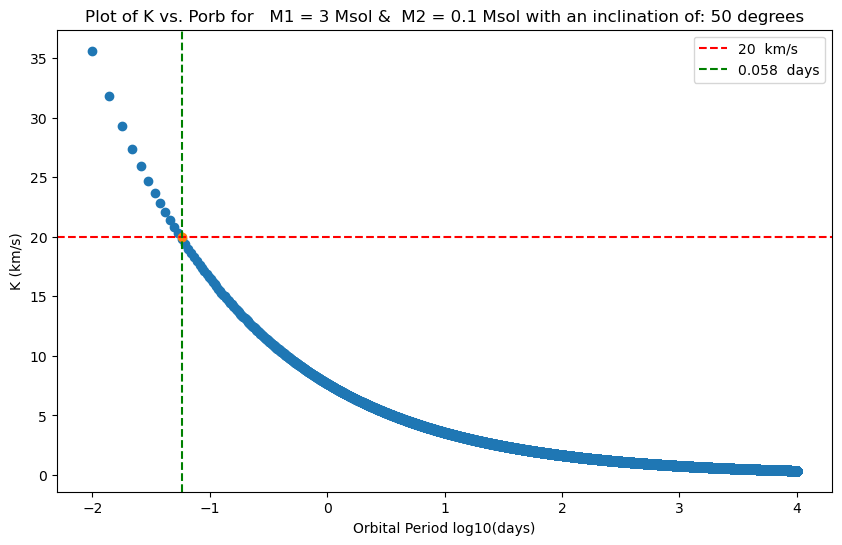

In [27]:
m1 =3  # Mass of star 1 in solar masses
m2 = 0.1 # Mass of star 2 in solar masses
inc = 50 #degrees
yval = 20



# Constants
Msol = 1.9891 * 10**30 #kg
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2



incl = np.deg2rad(inc)  # Inclination in radians (90 degrees for simplicity)

# Convert masses from solar masses to kilograms
M1 = m1 * Msol
M2 = m2 * Msol

Porb = np.linspace(0.01, 10000, 2500000) * 86400 

#Func:
#(M2^3 * sin^3(i))/(M1 + M2)**2    = (Porb * K**3) / (2*np.pi*G)


#find for sigma < 0.8????

K = (  (M2**3 * np.sin(incl)**3 * (2 * np.pi * G)) / (Porb * (M1 + M2)**2)  )**(1/3)

K = K/1000


intersect = (np.where(np.isclose(yval, K, 0.01))[0])



if(intersect.size > 0):
    intersect = int(np.mean(np.where(np.isclose(yval, K, 0.01))[0]))
    #print(intersect)
    print("K intersection: ", K[intersect], " km/s")
    print("Porb intersection: ", Porb[intersect]/86400, " days")

    yline = np.mean(Porb[intersect])/86400

    plt.figure(figsize=(10, 6))
    plt.scatter(np.log10(Porb/86400) , K)
    plt.xlabel('Orbital Period log_10(days)')
    plt.ylabel('K (km/s)')
    plt.title('Plot of K vs. Porb for   M1 = ' + str(m1) + " Msol &  M2 = " + str(m2) + " Msol with an inclination of: " + str(inc) + " degrees")
    plt.axhline(yval, color = "red", label = str(yval) + "  km/s", linestyle = "--")
    plt.axvline(np.log10(yline), color = "green", label = str(np.round(yline, 3)) + "  days", linestyle = "--")
    plt.scatter(np.log10(yline), yval)#, marker = '.')
    #plt.xlim(-50, 1000)
    #plt.grid(True)
    plt.legend()
    plt.show()


else:
    print('No intersections found in a reasonable range.')
    plt.figure(figsize=(10, 6))
    plt.plot(np.log10(Porb/86400) , K)
    plt.xlabel('Orbital Period log_10(days)')
    plt.ylabel('K (km/s)')
    plt.title('Plot of K vs. Porb for   M1 = ' + str(m1) + " Msol &  M2 = " + str(m2) + " Msol with an inclination of: " + str(inc) + " degrees")
    plt.axhline(yval, color = "red", label = str(yval) + "  km/s", linestyle = "--")
    #plt.xlim(-50, 1000)
    #plt.axvline(yline, color = "green")
    #plt.grid(True)
    plt.legend()
    plt.show()

For  90 degrees:
No intersections found in a reasonable range.

For  80 degrees:
No intersections found in a reasonable range.

For  70 degrees:
No intersections found in a reasonable range.

For  60 degrees:
No intersections found in a reasonable range.

For  50 degrees:
No intersections found in a reasonable range.

For  40 degrees:
No intersections found in a reasonable range.

For  30 degrees:
No intersections found in a reasonable range.

For  20 degrees:
No intersections found in a reasonable range.

For  10 degrees:
K intersection:  0.9999004074881215  km/s
Porb intersection:  1580.2250518700207  days

For  1 degrees:
K intersection:  1.0003701638237859  km/s
Porb intersection:  1.601999044799618  days

[0, 0, 0, 0, 0, 0, 0, 0, 1580.2250518700207, 1.601999044799618]


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

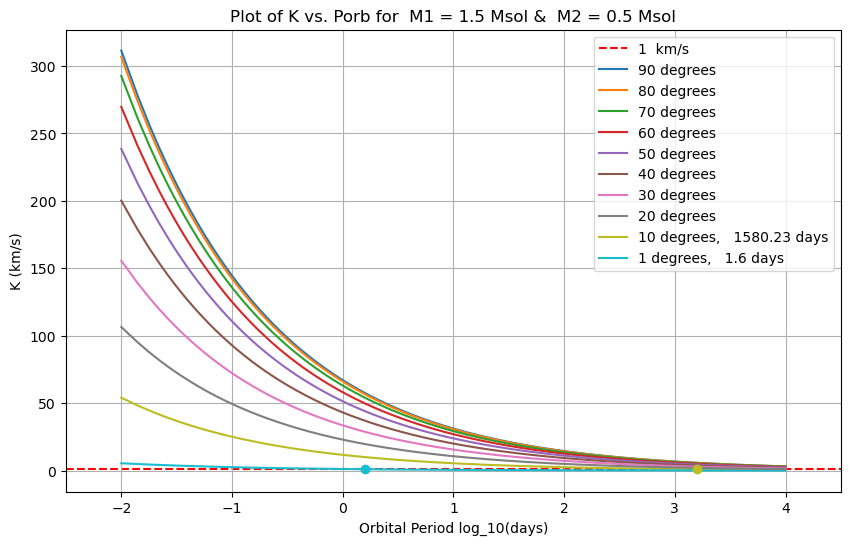

In [7]:
m1 = 1.5 # Mass of star 1 in solar masses
m2 = 0.5 # Mass of star 2 in solar masses
inc = [90,80,70,60,50,40,30,20,10,1] #degrees
yval = 1
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# Constants
Msol = 1.9891 * 10**30 #kg
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2



incl = np.deg2rad(inc)  # Inclination in radians (90 degrees for simplicity)

prange = []
krange = []
yline = []
kint = []
pint = []
for i in range(len(inc)):
    incl = np.deg2rad(inc[i])  # Inclination in radians (90 degrees for simplicity)
    # Convert masses from solar masses to kilograms
    M1 = m1 * Msol
    M2 = m2 * Msol
    Porb = np.linspace(0.01, 10000, 2500000) * 86400 
    #Func:
    #(M2^3 * sin^3(i))/(M1 + M2)**2    = (Porb * K**3) / (2*np.pi*G)
    #find for sigma < 0.8????
    K = (  (M2**3 * np.sin(incl)**3 * (2 * np.pi * G)) / (Porb * (M1 + M2)**2)  )**(1/3)
    K = K/1000
    
    intersect = (np.where(np.isclose(yval, K, 0.01))[0])
    plt.figure(figsize=(10, 6))
    
    if(intersect.size > 0):
        intersect = int(np.mean(np.where(np.isclose(yval, K, 0.01))[0]))
        #print(intersect)
        print("For ", inc[i], "degrees:")
        print("K intersection: ", K[intersect], " km/s")
        print("Porb intersection: ", Porb[intersect]/86400, " days")
        print()
        yline.append(np.mean(Porb[intersect])/86400)
        prange.append(Porb/86400)
        krange.append(K)
        kint.append(K[intersect])
        pint.append(Porb[intersect]/86400)
    
    else:
        print("For ", inc[i], "degrees:")
        print('No intersections found in a reasonable range.')
        print()
        prange.append(Porb/86400)
        krange.append(K)
        pint.append(0)
        kint.append(0)


fig,ax = plt.subplots(1, figsize = (10,6))    
print(pint)
ax.axhline(yval, color = "red", label = str(yval) + "  km/s", linestyle = "--", zorder = 1)

for j in range(len(prange)):
    if pint[j]>0:
        ax.plot(np.log10(prange[j]), krange[j], label = str(inc[j]) +" degrees,   " +str( np.round(pint[j],2)) + " days",zorder = 2)
        ax.scatter(np.log10(pint[j]), kint[j], zorder = 4, color = colors[j])

    else:
        ax.plot(np.log10(prange[j]), krange[j], label = str(inc[j])+ " degrees", zorder = 3)
        ax.scatter(pint[0], 0, zorder = 1, marker = ".", color = 'white')
        
    
ax.set_title('Plot of K vs. Porb for  M1 = ' + str(m1) + " Msol &  M2 = " + str(m2) + " Msol")
ax.set_xlabel('Orbital Period log_10(days)')
ax.set_ylabel('K (km/s)')
plt.xlim(-2.5,4.5)
ax.grid(True)
ax.legend()